In [1]:
import torch
import matplotlib.pyplot as plt
from IPython import display

import time

from train import run_epoch
from dataset import create_loaders
from vit import VisionTransformer

# plt.style.use('dark_background')
# plt.rcParams['figure.facecolor'] = (17 / 255, 17 / 255, 17 / 255)

# Train

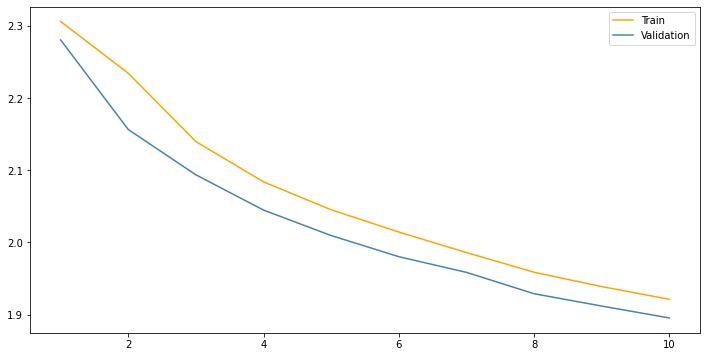

In [2]:
train_dataloader, validation_dataloader = create_loaders('cifar-10/train.pkl', 256)

transformer = VisionTransformer(
    image_shape=(3, 32, 32),
    patch_size=4,
    num_layers=4,
    transformer_dim=32,
    attention_heads=8,
    num_classes=10,
    dropout=0.1,
    pooling_type='class_token'
).cuda()

optimizer = torch.optim.Adam(transformer.parameters(), lr=1e-4)
loss_function = torch.nn.CrossEntropyLoss()

stats_history = { 'train': [], 'validation': [] }

plt.figure(figsize=(12, 6))

epochs = 10
for i in range(epochs):

    stats = run_epoch(transformer, optimizer, loss_function, train_dataloader, validation_dataloader, use_gpu=True)
    
    stats_history['train'].append(stats['train'].mean().item())
    stats_history['validation'].append(stats['validation'].mean().item())
    
    display.clear_output(True)
    
    if i == 0:
        plt.plot(range(1, i + 2), stats_history['train'], marker='.', color='orange', label='Train')
        plt.plot(range(1, i + 2), stats_history['validation'], marker='.', color='steelblue', label='Validation')
    else:
        plt.plot(range(1, i + 2), stats_history['train'], color='orange', label='Train')
        plt.plot(range(1, i + 2), stats_history['validation'], color='steelblue', label='Validation')

    plt.legend()

    if i < epochs - 1:
        display.display(plt.gcf())    
        plt.cla()

# Test

In [3]:
import torchvision

import pickle
import random

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

In [5]:
data = unpickle('cifar-10/test.pkl')
labels = unpickle('cifar-10/labels.pkl')

In [6]:
transformer.eval();

Predicted class: truck


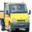

In [7]:
i = random.randint(0, 10_000 - 1)

x = torch.tensor(data['images'][i] / 255, dtype=torch.float).permute(2, 0, 1).unsqueeze(0)

print('Predicted class:', labels[torch.nn.functional.softmax(transformer.forward(x.cuda()), dim=1).argmax().item()])

torchvision.transforms.ToPILImage()(x.squeeze(0))